# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

* PARTE 1: 25 % carga y limpieza
    * Carga con Pandas: pd.read_csv

    * Limpieza de valores error: 
        * hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16

    * Limpieza de nulos (limpiar valores NaN):
        * Nulos en columnas continuas: mediana, media
        * Nulos en columnas categóricas: moda, un valor fijo

    * Encoding: texto a numérico
        * Uso de la función get_dummies() para encoding one_hot
        * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

* PARTE 2: 25 % transformaciones:
    * Uso de función apply:
        * crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)

    * Crear una nueva columna volumen combinando: x * y * z

    * Ordenar por dos columnas con sort_values():
        * tipo de corte (cut) y precio (price)

    * Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro


# EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

Dataset: diamonds.

IMPORTANTE: cargar el dataset desde CSV desde la carpeta Data porque tendrá nulos introducidos manualmente.

## PARTE 1: 
25 % carga y limpieza


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
# todos los necesarios para el ejercicio mientras usemos np y sns

###       * Carga con Pandas: pd.read_csv


In [41]:
df = pd.read_csv('../Data/diamonds.csv')

In [42]:
print("Primeras 10 filas del dataset:")
df.head(10)

Primeras 10 filas del dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4,4.05,2.39


In [43]:
print("Información inicial del dataset:")
df.info()

Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [44]:
df.describe()

,carat,depth,table,y,z
count,53939.000000,53940.000000,53938.000000,53939.000000,53939.000000
mean,0.797946,61.749405,57.457145,5.734479,3.538722
std,0.474013,1.432621,2.234521,1.142092,0.705700
min,0.200000,43.000000,43.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,4.040000
max,5.010000,79.000000,95.000000,58.900000,31.800000


In [45]:
df.shape


(53940, 10)

In [46]:
df.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [47]:
df.empty

False

In [11]:
# df.first_valid_index

In [48]:
df.query

<bound method DataFrame.query of        carat        cut color clarity  depth  table price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [49]:
df.values

array([[0.23, 'Ideal', 'E', ..., '3.95', 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., '3.89', 3.84, 2.31],
       [0.23, 'Good', 'E', ..., '4.05', 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., '5.66', 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., '6.15', 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., '5.83', 5.87, 3.64]], dtype=object)

###    * Limpieza de valores error: 


####       ** hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.


In [50]:
# Comprobar si hay valores nulos en cada columna (sean '?' o no)
print("Número de valores nulos por columna:")
print(df.isnull().sum())

Número de valores nulos por columna:
carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64


In [51]:
# Verificar si hay valores exactamente iguales a '?'
print((df == '?').any().any())


True


In [52]:
for col in df.select_dtypes(include='?'):
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)




In [53]:
# Buscar las filas donde hay valores '?'
rows_with_question_mark = df.isin(['?']).any(axis=1)

# Mostrar las filas que contienen '?'
rows_with_question_mark_df = df[rows_with_question_mark]
print("Filas con valores '?':")
print(rows_with_question_mark_df)

Filas con valores '?':
       carat    cut color clarity  depth  table price     x     y     z
49222   0.56  Ideal     ?    VVS2   61.6   56.0  2081     ?  5.29  3.27
49227   0.50      ?     E    VVS2   61.7   61.0  2083  5.09  5.12  3.15
49229   0.70   Good     H     VS2   63.8   60.0     ?  5.59  5.51  3.54


In [57]:
# Reemplazar valores '?' por NaN
df.replace('?', np.nan, inplace=True)


In [58]:
# Comprobar si hay valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum())

Número de valores nulos por columna:
carat      1
cut        4
color      3
clarity    2
depth      0
table      2
price      3
x          3
y          1
z          1
dtype: int64


###    * Cambio de tipo de dato: .astype() a numéricos y textos, por ejemplo a categorical y carat a float32 o float16


##### cambio de tipo de dato de carat , a float16

###    * Limpieza de nulos (limpiar valores NaN):


####        ** Nulos en columnas continuas: mediana, media


####        ** Nulos en columnas categóricas: moda, un valor fijo


###     * Encoding: texto a numérico


####         * Uso de la función get_dummies() para encoding one_hot


####         * Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4


## PARTE 2: 25 % transformaciones:


###     * Uso de función apply:


####         crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)


###    * Crear una nueva columna volumen combinando: x * y * z


###   * Ordenar por dos columnas con sort_values():


####       * tipo de corte (cut) y precio (price)


###     * Agrupaciones con groupby y visualizarla


####          * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth


## * PARTE 3: 20 % distribuciones: 


### * Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.


### * asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada, aplicar sobre precio, visualizar el histograma y/o boxplot por tipo de corte. Opcional ajustar la escala.


### * Discretizar la columna precio por barato, medio, caro usando la función pd.cut


## * PARTE 4: 30 % visualizaciones:


### * Seaborn EDAS:


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

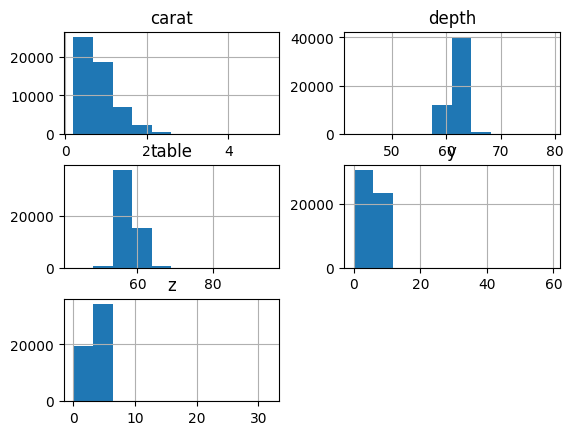

In [28]:
df.hist()

####     * univariantes:


#####         * histogramas y curvas de densidad


##### boxplot

#####         * countplot


####     * bivariantes y multivariantes


#####         * scatterplot con hue, con size, con style


#####         * Calcular correlación con Pandas y mostrarla con seaborn


#####         * Hacer la correlación en un gráfico de barras para la columna 'price'


#####         * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn


####     * Combinarlas con:


#####         * hue, style, size, row, col usando un relplot


#####         * filtro
